Data Date Range:
    <br />Start time: 2016-05-05 09:40:26
    <br />End time: 2018-01-17 01:59:42
    
#### This notebook does the following analysis:

## Evaluate and compare TagSimilarity based algorithms with Baseline

We compare the performance of Baseline with the performances of the three other algorithms (they are all based on TagSimilarity).
We use several metrics:
- Percentage of recommendations that are clicked (rec_played) among all trailers played (total_played)
- Percentages of recommendations liked among recommendations that are clicked;
- Percentages of recommendations played among recommendations that are clicked;

### Import

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Percentages of RC trailers by TagSimilarity based algorithms and by ShuffleTopPicks


In [3]:
# Percentages of trailers liked among total trailers played;
total_played_likes = pd.read_csv('../Clean_Data/total_played_liked.csv', sep=',')
total_played_likes_clean = total_played_likes.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [4]:
total_played_likes_clean.loc[total_played_likes_clean.recommenderId == 'ShuffledTopPicks', 'recommenderId'] = 'Baseline'

total_played_likes_clean.head()

,userId,loginId,movieId,action,tstamp,recommenderId,isLiked
0,283320,5NUxm3d,4612,PlayedFromLaunch,2016-05-05 16:54:49,PredictedRating,NaN
1,271845,28lSfpJ,60684,PlayedFromLaunch,2016-05-05 16:54:55,PredictedRating,NaN
2,271845,28lSfpJ,4448,PlayedFromLaunch,2016-05-05 17:00:37,PredictedRating,NaN
3,271845,28lSfpJ,1234,PlayedFromNext,2016-05-05 17:01:30,PredictedRating,NaN
4,198215,3KDHjBg,90531,PlayedFromLaunch,2016-05-05 19:52:38,TagSimilarity,NaN


In [5]:
count_similarity_likes = total_played_likes_clean[total_played_likes_clean['recommenderId']!='Baseline'].count()['isLiked']
count_similarity_played = total_played_likes_clean[total_played_likes_clean['recommenderId']!='Baseline'].count()['movieId']

# Percentages of trailers liked among total trailers played, for Similarity based algorithms:
count_similarity_likes/count_similarity_played

# Percentages of trailers liked among total trailers played, for baseline:
count_similarity_likes/count_similarity_played

0.017384046739000833

In [6]:
count_base_likes = total_played_likes_clean[total_played_likes_clean['recommenderId']=='Baseline'].count()['isLiked']
count_base_played = total_played_likes_clean[total_played_likes_clean['recommenderId']=='Baseline'].count()['movieId']

count_base_likes/count_base_played

0.01550274578412791

### Percentages of trailers liked among recommendations played for TagSimilarity based algorithms and Baseline


In [7]:
rec_played_likes = pd.read_csv('../Clean_Data/rec_played_liked.csv', sep=',')
rec_played_likes_clean = rec_played_likes.drop(['Unnamed: 0'], axis=1)

rec_played_likes_clean.loc[rec_played_likes_clean.recommenderId == 'ShuffledTopPicks', 'recommenderId'] = 'Baseline'



In [9]:
num_trailer_likes2 = rec_played_likes_clean.groupby(['recommenderId','isLiked']).count().unstack()['userId']['TrailerLiked']
num_trailer_likes2.head()


count_base_likes2 = rec_played_likes_clean[rec_played_likes_clean['recommenderId']=='Baseline'].count()['isLiked']
count_base_played2 = rec_played_likes_clean[rec_played_likes_clean['recommenderId']=='Baseline'].count()['movieId']

# Percentages of trailers liked among recommendations played, for 'ShuffledTopPicks':
count_base_likes2/count_base_played2


0.03725346968590212

In [10]:
count_similarity_likes2 = rec_played_likes_clean[rec_played_likes_clean['recommenderId']!='Baseline'].count()['isLiked']
count_similarity_played2 = rec_played_likes_clean[rec_played_likes_clean['recommenderId']!='Baseline'].count()['movieId']

# Percentages of trailers liked among recommendations played, for Similarity based algorithms:
count_similarity_likes2/count_similarity_played2

####### It's interesting that baseline performs better in this case

0.030618808696770874

### Percentages of recommendations clicked among total trailers played for TagSimilarity based algorithms and Baseline

In [11]:
count_rec_base = rec_played_likes_clean[rec_played_likes_clean['recommenderId'] == 'Baseline'].count()['movieId']
count_total_base = total_played_likes_clean[total_played_likes_clean['recommenderId'] == 'Baseline'].count()['movieId']

# Percentages of recommendations played among total played, for ShuffledTopPicks:
count_rec_base/count_total_base


0.033265296204500173

In [12]:
count_rec_similarity = rec_played_likes_clean[rec_played_likes_clean['recommenderId'] != 'Baseline'].count()['movieId']
count_total_similarity = total_played_likes_clean[total_played_likes_clean['recommenderId'] != 'Baseline'].count()['movieId']

# Percentages of recommendations played among total played, for Similarity based algorithms:
count_rec_similarity/count_total_similarity

##### It's interesting that similarity based algorithms are having a much better performance here!


0.061786097531894596

### Visualizations: Recommendations clicked / total trailers played

In [13]:
aggregate_data= pd.read_csv('../Clean_Data/total_rec_refresh_aggregate.csv', sep=',').drop('Unnamed: 0',axis=1).copy()

aggregate_data.head()

,userId,loginId,Algorithm,count_total_played,count_rec_played,count_refresh
0,1892,Nm0bajY,TagSimilarity,1,0.0,0.0
1,12337,OnHpLST,PredictedRating,1,0.0,0.0
2,16783,2bqCVrC,TagSimilarity,19,0.0,0.0
3,22005,M1nww5f,ShuffledTopPicks,1,0.0,0.0
4,26229,t7hZ2Ty,PredictedRating,1,0.0,0.0


In [14]:
# aggregate_data[aggregate_data['Algorithm']!='TagSimilarity'].loc('Algorithm','SimilarityBased')
aggregate_data.loc[aggregate_data.Algorithm != 'ShuffledTopPicks', 'Algorithm'] = 'SimilarityBased'
aggregate_data.loc[aggregate_data.Algorithm == 'ShuffledTopPicks', 'Algorithm'] = 'Baseline'

In [15]:
aggregate_data_wpercent = aggregate_data.groupby('Algorithm').sum().reset_index()
aggregate_data_wpercent['rec_played/total_played'] = aggregate_data_wpercent['count_rec_played']/aggregate_data_wpercent['count_total_played']

In [16]:
aggregate_data_wpercent

,Algorithm,userId,count_total_played,count_rec_played,count_refresh,rec_played/total_played
0,Baseline,3462185690,41154,1369.0,43.0,0.033265
1,SimilarityBased,10451129697,125805,7773.0,295.0,0.061786


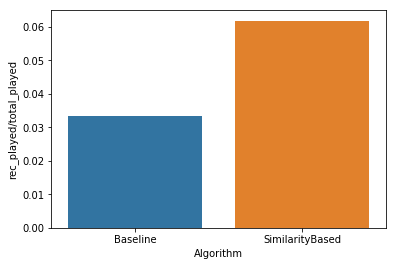

In [17]:
ax = sns.barplot(x="Algorithm", y="rec_played/total_played", data=aggregate_data_wpercent)
# ax.set_ylim(0,0.1)

### Visualizations: Recommendations liked / Recommendations clicked

In [18]:
# Load data:
rec_played_liked = pd.read_csv('../Clean_Data/rec_played_liked.csv', sep=',')

# aggregate_data[aggregate_data['Algorithm']!='TagSimilarity'].loc('Algorithm','SimilarityBased')
rec_played_liked.loc[rec_played_liked.recommenderId != 'ShuffledTopPicks', 'recommenderId'] = 'SimilarityBased'
rec_played_liked.loc[rec_played_liked.recommenderId == 'ShuffledTopPicks', 'recommenderId'] = 'Baseline'

In [19]:
rec_played_liked_clean = rec_played_liked.drop(['Unnamed: 0'], axis=1)
# mlusers = [32451,49002,49253,50540,51234,51714,65817,66644,68903,70023,70026,92721,92723,95195,96279,96483,96691,97397,104218,113699,114092,114844,122798,124450,124790,125283,125431,127628,127979,129299,130353,132131,132145,132637,132726,132728,132871,133047,134070,134088,134143,134235,134342,134349,134372,134373,134393,134484,134496,134498,134504,134533,135260,135670,136346,136505,136995,137096,137331,137372,138083,138089,138090,138108,141799,142115,143473,149815,151709,151982,166008,173637,176970,183038,183567,197881,202657,207221,221192,221515,225510,233659,233985,237287,237332,238576,238876,240312,242238,242683,243010,243445,245696,246018,246058,246587,246828,248583,251610,251922,252238,252534,253066,253866,253869,257628,257629,257756,258553,258554,258555,258556,258557,258558,258559,258560,258561,258562,258563,258564,258565,259056,260701,264178,266542,268253,269945,286014,287206,292397,301040,304542,313322,316070,317416,318334]
# rec_played_liked_noml = rec_played_liked_clean[~rec_played_liked_clean.userId.isin(mlusers)]
rec_played_liked_clean.count()

userId           9142
loginId          9142
movieId          9142
action           9142
tstamp_x         9142
position         9142
sessionIds       9142
recommenderId    9142
isLiked           289
tstamp_y          289
dtype: int64

In [20]:
# How many trailers, among all trailers played, are liked and disliked, for each algorithm?
num_rec_likes = rec_played_liked_clean.groupby(['recommenderId','isLiked']).count().unstack()['movieId']['TrailerLiked']
num_rec_dislikes = rec_played_liked_clean.groupby(['recommenderId','isLiked']).count().unstack()['movieId']['TrailerDisliked']

# How many are played, for each algorithm assignment?
num_recs= rec_played_liked_clean.groupby('recommenderId').count()['movieId']

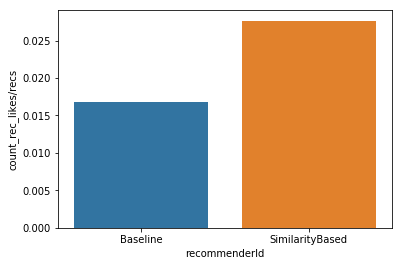

In [21]:
#Calculate the percentage:
percent_rec_likes = (num_rec_likes/num_recs).reset_index()
percent_rec_likes.rename(columns={0:'count_rec_likes/recs'},inplace=True)

#Visualize result:
ax = sns.barplot(x="recommenderId", y="count_rec_likes/recs", data=percent_rec_likes)
# ax.set_xlim(0,0.04)

#It's interesting that TagSimilarity has a worse performance than ShuffledTopPicks